In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

Define number of particles and get random positions (between 0 and 1) for each particle

In [2]:
n_particles = 16
r = np.random.random((2,n_particles))
# Color particles the start on either side
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

Give IDs to each particle (this will come in handy later)

In [3]:
ids = np.arange(n_particles)

In [4]:
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Plot initial configuration of particles

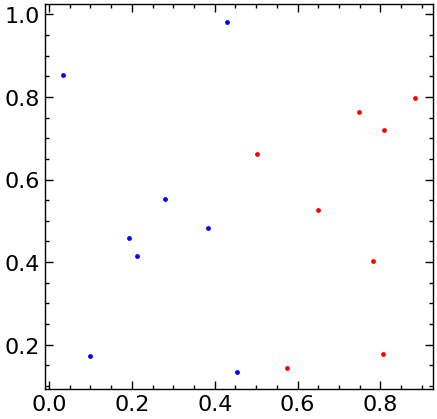

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6)

Obtain the initial velocities in the gas. We'll make the particles starting on the RHS move to the left at 500m/s and on the vice versa.

* **Note**: We're using the assumption that particles in a gas move at approximately 500m/s, thanks google.

In [6]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

To run this simulation, we need to determine when two particles collide, and what the resulting final velocities will be.

# Part 1: Distance Between all Pairs

* To determine if two particles collide, we need to find the distance between **all pairs** of particles. If the distance is less than 2 times the radius of each particle, they collide. If there are $n$ particles, there are $n(n-1)/2$ pairs (combinatorics). To make this easier, we'll get pairs of particle IDs.

In [7]:
ids_pairs = np.asarray(list(combinations(ids,2)))
#ids_pairs

We can obtain distances between particles in a similar fashion

* First get the pairs of x-positions of all particles

In [8]:
x_pairs = np.asarray(list(combinations(r[0],2)))
x_pairs

array([[0.65022732, 0.88398357],
       [0.65022732, 0.09942001],
       [0.65022732, 0.19261615],
       [0.65022732, 0.80528636],
       [0.65022732, 0.45490287],
       [0.65022732, 0.74776047],
       [0.65022732, 0.27893967],
       [0.65022732, 0.38382892],
       [0.65022732, 0.03336221],
       [0.65022732, 0.21136625],
       [0.65022732, 0.78130565],
       [0.65022732, 0.42942599],
       [0.65022732, 0.50233137],
       [0.65022732, 0.57357851],
       [0.65022732, 0.80904132],
       [0.88398357, 0.09942001],
       [0.88398357, 0.19261615],
       [0.88398357, 0.80528636],
       [0.88398357, 0.45490287],
       [0.88398357, 0.74776047],
       [0.88398357, 0.27893967],
       [0.88398357, 0.38382892],
       [0.88398357, 0.03336221],
       [0.88398357, 0.21136625],
       [0.88398357, 0.78130565],
       [0.88398357, 0.42942599],
       [0.88398357, 0.50233137],
       [0.88398357, 0.57357851],
       [0.88398357, 0.80904132],
       [0.09942001, 0.19261615],
       [0.

* Then take the difference to get $\Delta x_{ij}$ of all pairs

In [9]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([ 0.23375625, -0.55080731, -0.45761117,  0.15505905, -0.19532445,
        0.09753315, -0.37128765, -0.2663984 , -0.61686511, -0.43886107,
        0.13107833, -0.22080132, -0.14789595, -0.07664881,  0.158814  ,
       -0.78456357, -0.69136742, -0.07869721, -0.4290807 , -0.1362231 ,
       -0.60504391, -0.50015465, -0.85062136, -0.67261732, -0.10267792,
       -0.45455758, -0.38165221, -0.31040507, -0.07494226,  0.09319614,
        0.70586636,  0.35548286,  0.64834047,  0.17951966,  0.28440892,
       -0.0660578 ,  0.11194625,  0.68188564,  0.33000599,  0.40291136,
        0.4741585 ,  0.70962131,  0.61267022,  0.26228672,  0.55514432,
        0.08632352,  0.19121278, -0.15925394,  0.0187501 ,  0.5886895 ,
        0.23680985,  0.30971522,  0.38096236,  0.61642517, -0.35038349,
       -0.05752589, -0.5263467 , -0.42145744, -0.77192415, -0.59392011,
       -0.02398071, -0.37586037, -0.302955  , -0.23170786,  0.00375495,
        0.2928576 , -0.17596321, -0.07107395, -0.42154066, -0.24

The total distance is just $d_{ij}= \sqrt{\Delta x_{ij}^2 + \Delta y_{ij}^2}$. Since there are $n(n-1)/2$ pairs, there will be $n(n-1)/2$ different values of $d_{ij}$.

In [10]:
x_pairs = np.asarray(list(combinations(r[0],2)))
y_pairs = np.asarray(list(combinations(r[1],2)))
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.35740362, 0.65518499, 0.46274079, 0.38120309, 0.43775053,
       0.25561244, 0.37222813, 0.27010557, 0.69818544, 0.45314677,
       0.18033313, 0.50634524, 0.20043391, 0.3907229 , 0.25020908,
       1.00317459, 0.7700379 , 0.62358928, 0.78899416, 0.14042347,
       0.65236044, 0.59106152, 0.85250606, 0.77413936, 0.40736286,
       0.49087743, 0.40485253, 0.7234665 , 0.10746035, 0.30088128,
       0.70589676, 0.35739946, 0.87732865, 0.42138964, 0.42084481,
       0.68500376, 0.2665558 , 0.71993311, 0.87507171, 0.63443632,
       0.4750045 , 0.89667149, 0.6734263 , 0.41611781, 0.63340342,
       0.12847537, 0.19272713, 0.4265699 , 0.04798937, 0.59126612,
       0.57536934, 0.37085737, 0.4939564 , 0.66981588, 0.35307532,
       0.58733908, 0.64608829, 0.51944827, 1.02559353, 0.63885378,
       0.22567103, 0.88743476, 0.57059159, 0.23431981, 0.54160108,
       0.69295598, 0.45371255, 0.35436097, 0.8332669 , 0.37024328,
       0.42227224, 0.84780716, 0.52916669, 0.11898875, 0.68392

# Part 2: Velocities of a Collision

So at each iteration of the simulation, we will evaluate `d_pairs`, and if any of the distances between particles is less than $2r$, then a collision occurs. What is the final velocity of each of the two spheres? In an elastic collision (conservation of energy + momentum + angular momentum), one can show

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

In [11]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[ 1, 15],
       [ 3, 10],
       [ 5, 14],
       [ 6, 15]])

We will call all the particles in the left column "1" and the right column "2"

In [12]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Then we can compute the new velocity:

In [13]:
v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)

# Part 3: Functions to Run the Simulation

Here we define some functions that will help make running the simulation easier.

In [14]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Set the radius and find the position of all particles as a function of time (3D array `rs` where each axis is $(t,x,y)$).

In [15]:
radius = 0.03
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Plot red and blue circles, making sure each is the correct size.

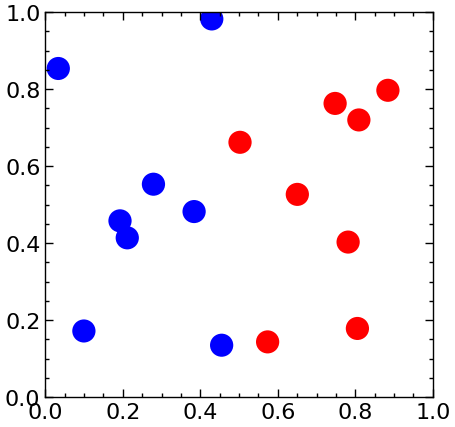

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Make initial animation of the simulation

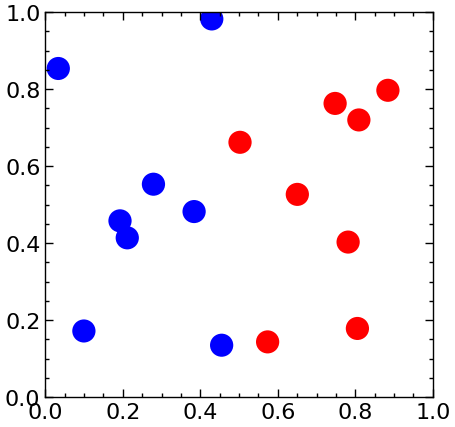

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

Now that we're sure that it works, lets make a simulation containing many more particles

In [18]:
n_particles = 400
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Let's look at the final velocity distribution of the particles and compare it to Maxwell-Boltzmann in 2 Dimensions:

* $kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

In [19]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Plot the final histogram next to this curve:

Text(0, 0.5, '# Particles')

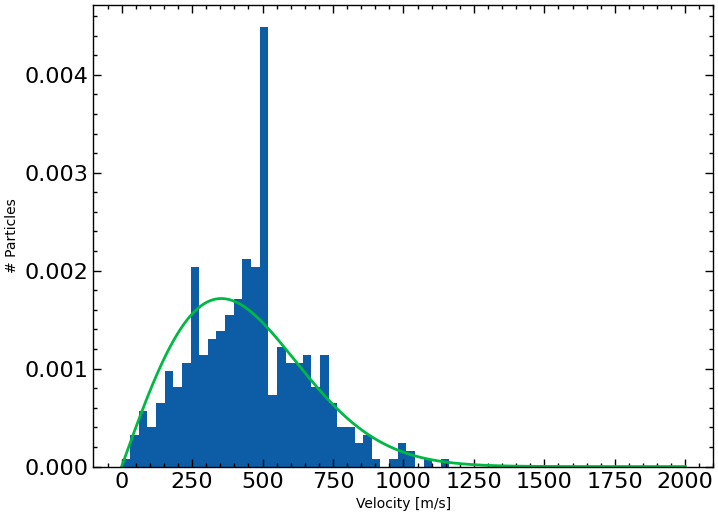

In [21]:
bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

Finally, we can make an animation of the particles moving around and the histogram at the same time

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)